In [ ]:
# Ashley Mayo
# Pet Adoption Prediction Project
# DSC:680 Applied Data Science
# March 17th, 2025

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

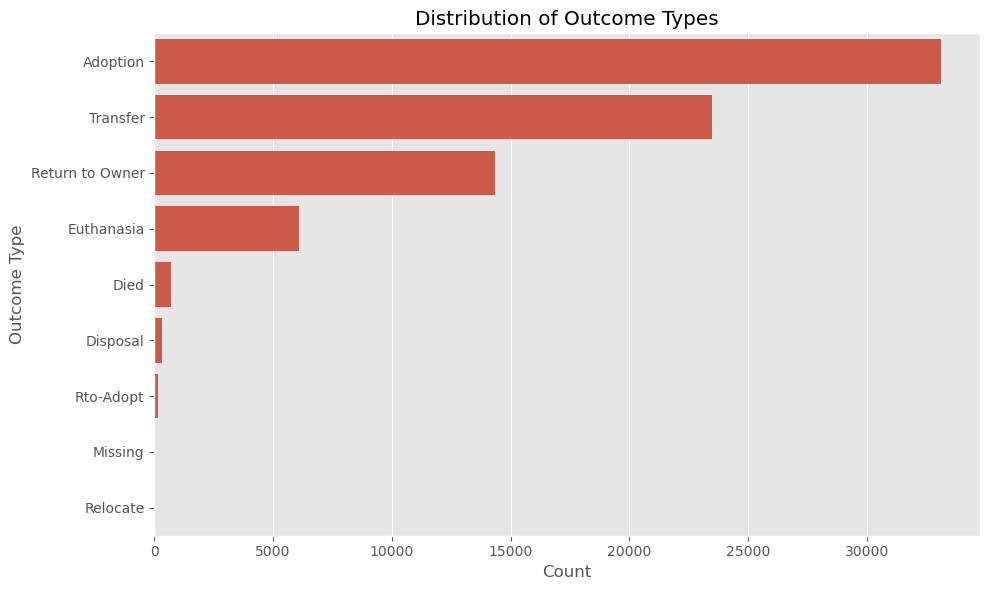

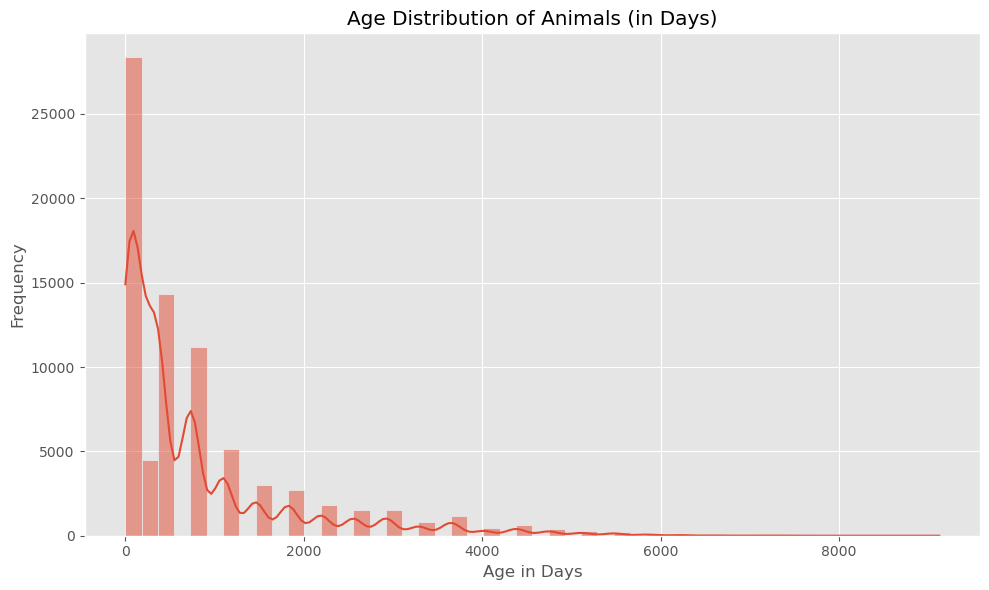

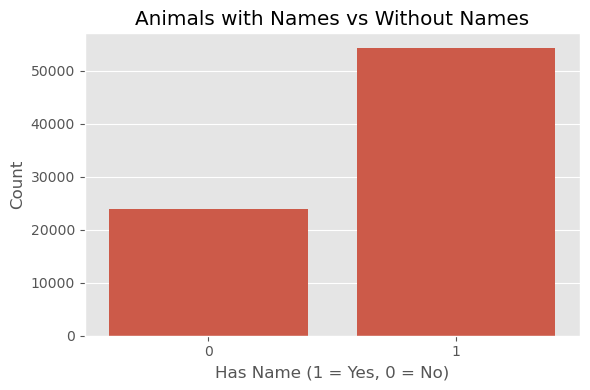

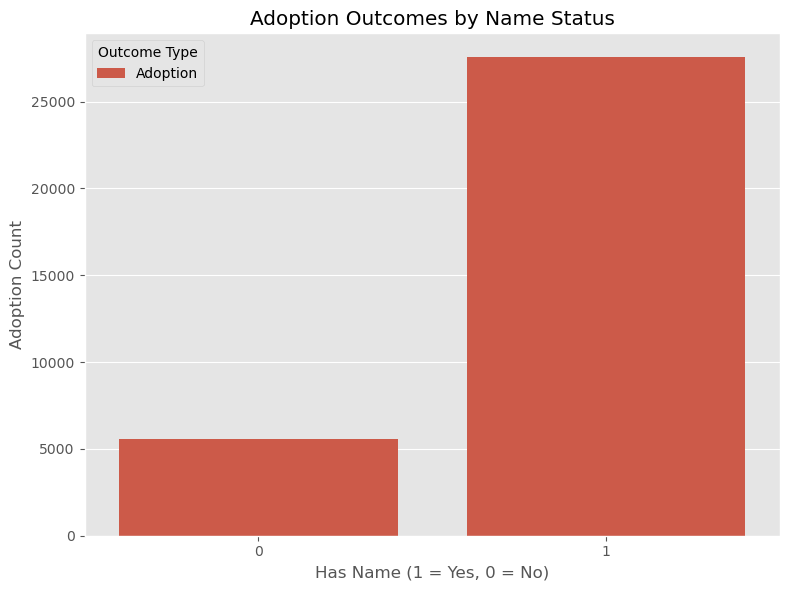

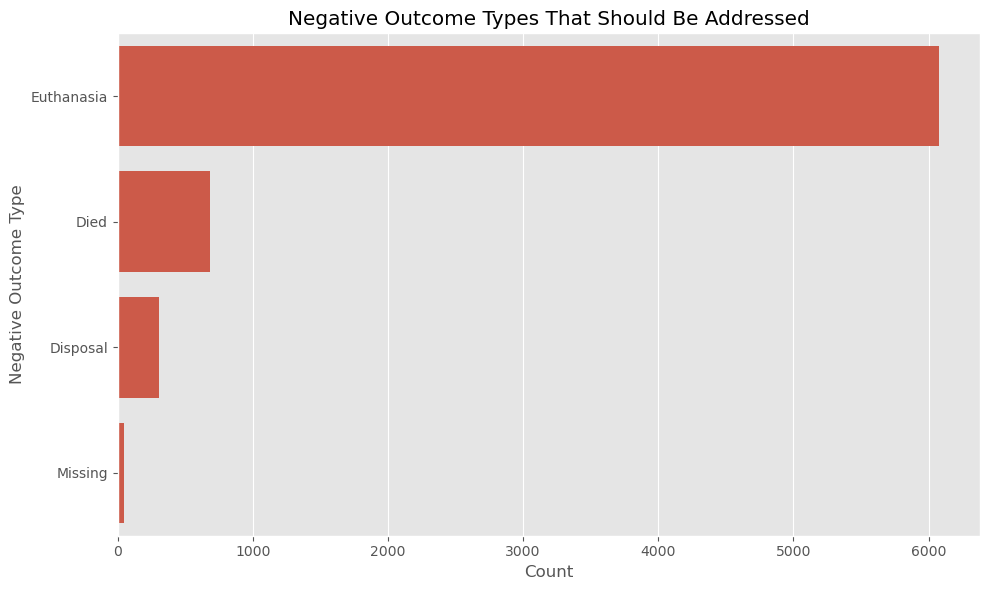


Decision Tree Classifier - Classification Report:

                 precision    recall  f1-score   support

       Adoption       0.79      0.41      0.54      6623
           Died       0.05      0.19      0.08       136
       Disposal       0.06      0.77      0.11        61
     Euthanasia       0.36      0.07      0.12      1215
        Missing       0.00      0.33      0.00         9
       Relocate       0.02      1.00      0.04         3
Return to Owner       0.46      0.12      0.19      2871
      Rto-Adopt       0.00      0.73      0.01        30
       Transfer       0.87      0.32      0.47      4700

       accuracy                           0.31     15648
      macro avg       0.29      0.44      0.17     15648
   weighted avg       0.71      0.31      0.42     15648



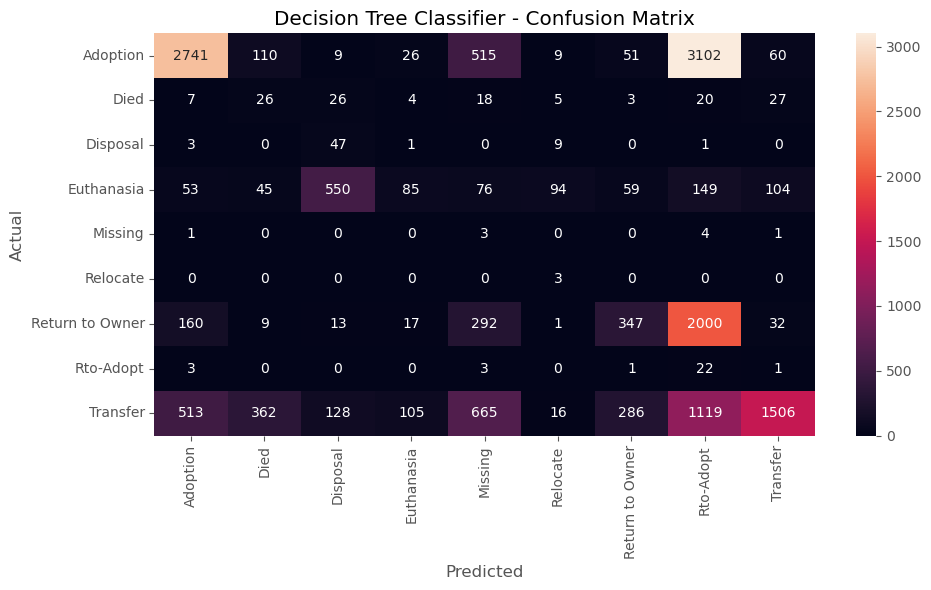

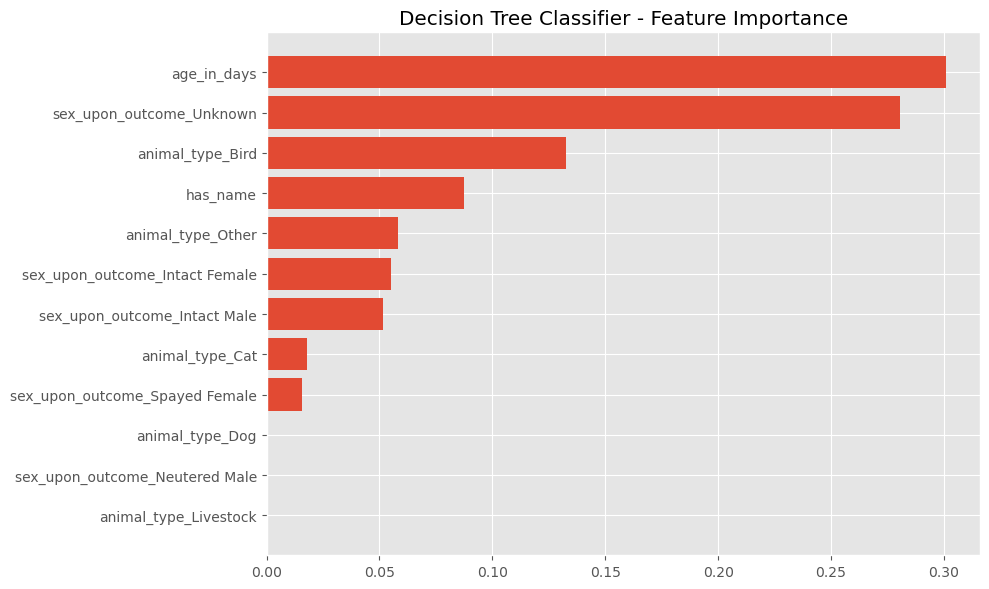

Cross-Validation Accuracy Scores: [0.43257924 0.30182771 0.26437883 0.33738097 0.31609893]
Average Accuracy: 0.3304531375242881


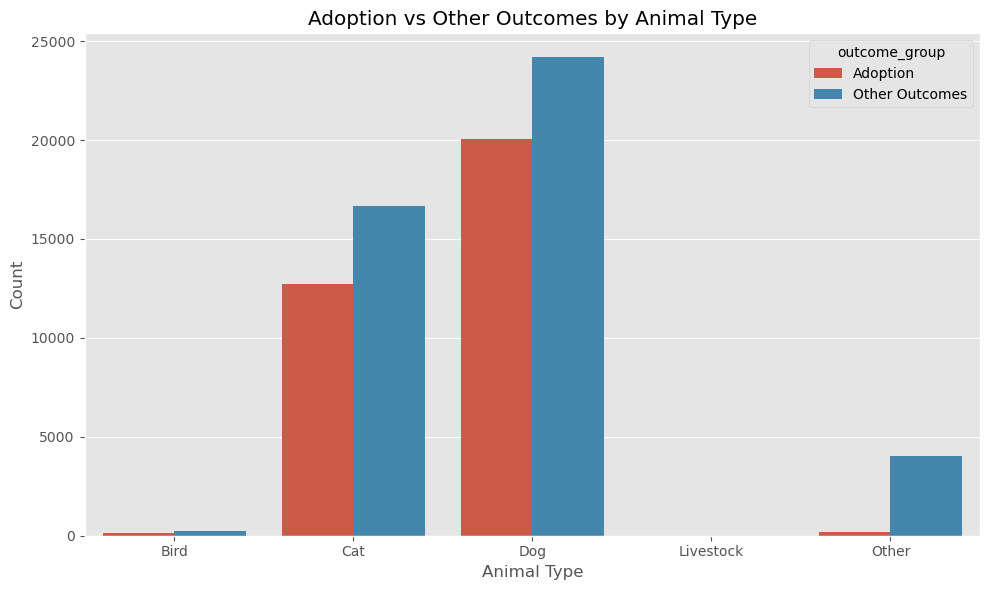

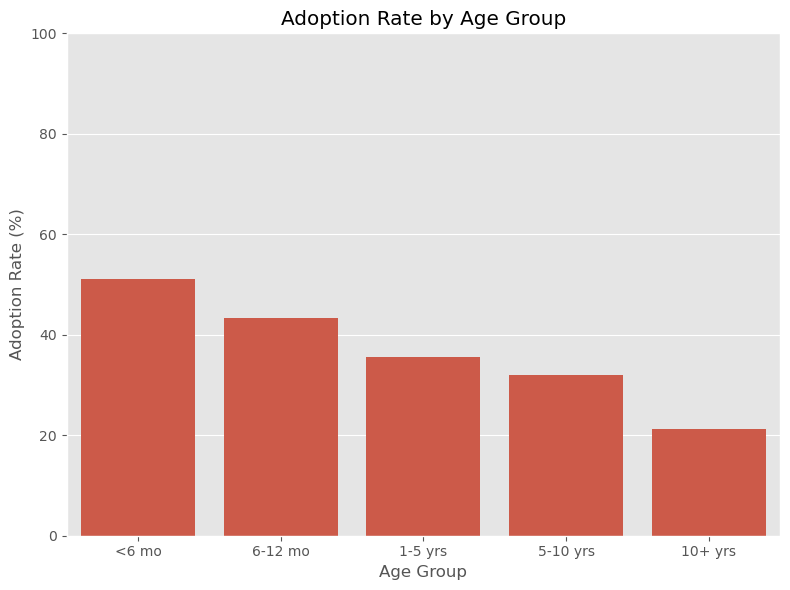

In [24]:
# Set ggplot style
plt.style.use('ggplot')

# Load dataset
def load_data(filepath):
    return pd.read_csv(filepath)
    head()

# Preprocess dataset
def preprocess_data(df):
    df = df.dropna(subset=['outcome_type']).copy()
    df.loc[:, 'sex_upon_outcome'] = df['sex_upon_outcome'].fillna('Unknown')
    df.loc[:, 'has_name'] = df['name'].notnull().astype(int)

    def convert_age_to_days(age_str):
        if pd.isnull(age_str):
            return np.nan
        num, unit = age_str.split()[:2]
        num = int(num)
        if 'day' in unit:
            return num
        elif 'week' in unit:
            return num * 7
        elif 'month' in unit:
            return num * 30
        elif 'year' in unit:
            return num * 365
        return np.nan

    df.loc[:, 'age_in_days'] = df['age_upon_outcome'].apply(convert_age_to_days)
    df = df.dropna(subset=['age_in_days']).copy()
    return df

# Encode and split data
def encode_and_split(df, features, target):
    X = df[features]
    y = df[target]
    X_encoded = pd.get_dummies(X, columns=['animal_type', 'sex_upon_outcome'])
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test, X_encoded, y

# Train and evaluate model with reporting
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Feature importance plot
def plot_feature_importance(model, feature_names, model_name="Model"):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.title(f"{model_name} - Feature Importance")
        plt.tight_layout()
        plt.show()

# Cross-validation scoring
def run_cross_validation(model, X, y):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross-Validation Accuracy Scores:", scores)
    print("Average Accuracy:", scores.mean())

# Additional Visualizations

def plot_outcome_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(y='outcome_type', data=df, order=df['outcome_type'].value_counts().index)
    plt.title('Distribution of Outcome Types')
    plt.xlabel('Count')
    plt.ylabel('Outcome Type')
    plt.tight_layout()
    plt.show()

def plot_age_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['age_in_days'], bins=50, kde=True)
    plt.title('Age Distribution of Animals (in Days)')
    plt.xlabel('Age in Days')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_has_name_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='has_name', data=df)
    plt.title('Animals with Names vs Without Names')
    plt.xlabel('Has Name (1 = Yes, 0 = No)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def plot_adoption_by_name_status(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='has_name', hue='outcome_type', data=df[df['outcome_type'].isin(['Adoption'])])
    plt.title('Adoption Outcomes by Name Status')
    plt.xlabel('Has Name (1 = Yes, 0 = No)')
    plt.ylabel('Adoption Count')
    plt.legend(title='Outcome Type')
    plt.tight_layout()
    plt.show()

def plot_negative_outcomes(df):
    plt.figure(figsize=(10, 6))
    negative_outcomes = df[df['outcome_type'].isin(['Euthanasia', 'Died', 'Disposal', 'Missing'])]
    sns.countplot(y='outcome_type', data=negative_outcomes, order=negative_outcomes['outcome_type'].value_counts().index)
    plt.title('Negative Outcome Types That Should Be Addressed')
    plt.xlabel('Count')
    plt.ylabel('Negative Outcome Type')
    plt.tight_layout()
    plt.show()

def plot_adoption_vs_other_by_animal_type(df):
    """Plot adoption rate vs other outcomes by animal type."""
    plt.style.use('ggplot')
    df = df.dropna(subset=["outcome_type"])
    df["is_adopted"] = df["outcome_type"] == "Adoption"

    # Group by animal_type and outcome_type (Adoption vs Other)
    df["outcome_group"] = df["is_adopted"].replace({True: "Adoption", False: "Other Outcomes"})
    grouped = df.groupby(["animal_type", "outcome_group"]).size().reset_index(name="count")

    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped, x="animal_type", y="count", hue="outcome_group")
    plt.title("Adoption vs Other Outcomes by Animal Type")
    plt.ylabel("Count")
    plt.xlabel("Animal Type")
    plt.tight_layout()
    plt.show()

def plot_adoption_by_age_group(df):
    plt.style.use('ggplot')
    df["is_adopted"] = df["outcome_type"] == "Adoption"

    bins = [0, 180, 365, 1825, 3650, df["age_in_days"].max() + 1]
    labels = ["<6 mo", "6-12 mo", "1-5 yrs", "5-10 yrs", "10+ yrs"]
    df["age_group"] = pd.cut(df["age_in_days"], bins=bins, labels=labels)

    adoption_rates = df.groupby("age_group", observed=True)["is_adopted"].mean().reset_index()
    adoption_rates["adoption_rate"] = adoption_rates["is_adopted"] * 100

    plt.figure(figsize=(8, 6))
    sns.barplot(data=adoption_rates, x="age_group", y="adoption_rate")
    plt.title("Adoption Rate by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Adoption Rate (%)")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

# Main execution pipeline
if __name__ == "__main__":
    file_path = "./aac_shelter_outcomes.csv"
    df = load_data(file_path)
    df_clean = preprocess_data(df)

    features = ['animal_type', 'sex_upon_outcome', 'has_name', 'age_in_days']
    X_train, X_test, y_train, y_test, X_all, y_all = encode_and_split(df_clean, features, 'outcome_type')
    X_all = X_all.copy()
    y_all = y_all.copy()

    # Visualization 1 - Outcome Distribution
    plot_outcome_distribution(df_clean)

    # Visualization 2 - Age Distribution
    plot_age_distribution(df_clean)

    # Visualization 3 - Has Name Distribution
    plot_has_name_distribution(df_clean)

    # Visualization 4 - Adoption vs Has Name
    plot_adoption_by_name_status(df_clean)

    # Visualization 5 - Negative Outcomes Storytelling Impact
    plot_negative_outcomes(df_clean)

    # Decision Tree with class_weight='balanced'
    dt_model = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)
    train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, model_name="Decision Tree Classifier")

    # Visualization 6 - Feature Importance
    plot_feature_importance(dt_model, X_train.columns, model_name="Decision Tree Classifier")

    # Visualization 7 - Cross-validation Summary (printed)
    run_cross_validation(dt_model, X_all, y_all)

    #Visualization 8 - 
    plot_adoption_vs_other_by_animal_type(df_clean)

    # Visualization 9 - Adoption animal by type
    plot_adoption_by_age_group(df_clean)
    

In [18]:
# Preprocess dataset
def preprocess_data(df):
    df = df.dropna(subset=['outcome_type']).copy()
    df.loc[:, 'sex_upon_outcome'] = df['sex_upon_outcome'].fillna('Unknown')
    df.loc[:, 'has_name'] = df['name'].notnull().astype(int)

    def convert_age_to_days(age_str):
        if pd.isnull(age_str):
            return np.nan
        num, unit = age_str.split()[:2]
        num = int(num)
        if 'day' in unit:
            return num
        elif 'week' in unit:
            return num * 7
        elif 'month' in unit:
            return num * 30
        elif 'year' in unit:
            return num * 365
        return np.nan

    df.loc[:, 'age_in_days'] = df['age_upon_outcome'].apply(convert_age_to_days)
    df = df.dropna(subset=['age_in_days']).copy()
    return df

In [4]:
# Encode and split data
def encode_and_split(df, features, target):
    X = df[features]
    y = df[target]
    X_encoded = pd.get_dummies(X, columns=['animal_type', 'sex_upon_outcome'])
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test, X_encoded, y

In [9]:
df_raw = pd.read_csv(file_path)
df_raw.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [10]:
df_cleaned = preprocess_data(df_raw)
df_cleaned.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,has_name,age_in_days
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,0,14.0
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365.0
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365.0
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,1,3285.0
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,0,150.0
